Gallstone Prediction

The clinical dataset was collected from the Internal Medicine Outpatient Clinic of Ankara VM Medical Park Hospital and includes data from 319 individuals (June 2022–June 2023), 161 of whom were diagnosed with gallstone disease. It contains 38 features, including demographic, bioimpedance, and laboratory data, and was ethically approved by the Ankara City Hospital Ethics Committee (E2-23-4632). Demographic variables are age, sex, height, weight, and BMI. Bioimpedance data includes total, extracellular, and intracellular water, muscle and fat mass, protein, visceral fat area, and hepatic fat. Laboratory features are glucose, total cholesterol, HDL, LDL, triglycerides, AST, ALT, ALP, creatinine, GFR, CRP, hemoglobin, and vitamin D. The dataset is complete, with no missing values, and balanced in terms of disease status, eliminating the need for additional preprocessing. It provides a strong foundation for machine learning-based gallstone prediction using non-imaging features.

In this project I am using classification models to predict the gallstone present or not from the features provided. This is a binary classfication problem.

In [1]:
#importing the necessary libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

import joblib

In [3]:
#loading the dataset

In [4]:
df = pd.read_csv("dataset-uci.csv")
df.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [5]:
#statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

The dataset does not have any null values. All features are numerical so we do not need feature encoding

In [7]:
df.describe()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


In [8]:
#columns

In [9]:
df.columns

Index(['Gallstone Status', 'Age', 'Gender', 'Comorbidity',
       'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia',
       'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)',
       'Total Body Water (TBW)', 'Extracellular Water (ECW)',
       'Intracellular Water (ICW)',
       'Extracellular Fluid/Total Body Water (ECF/TBW)',
       'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)',
       'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)',
       'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)',
       'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)',
       'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)',
       'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)',
       'High Density Lipoprotein (HDL)', 'Triglyceride',
       'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)',
       'Alkaline Phosphatase (ALP)', 'Creatinine',
       'Glomerular Filtration Rate (GFR

In [10]:
#checking class imbalance

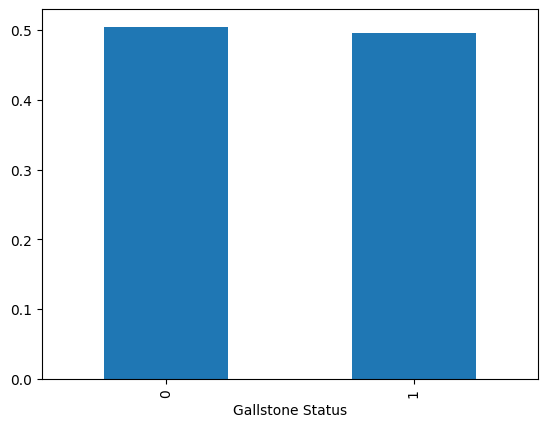

In [11]:
df['Gallstone Status'].value_counts(normalize=True).plot(kind='bar')
plt.show()

The class distribution is balanced. 

In [12]:
#correlation matrix to find the correlation

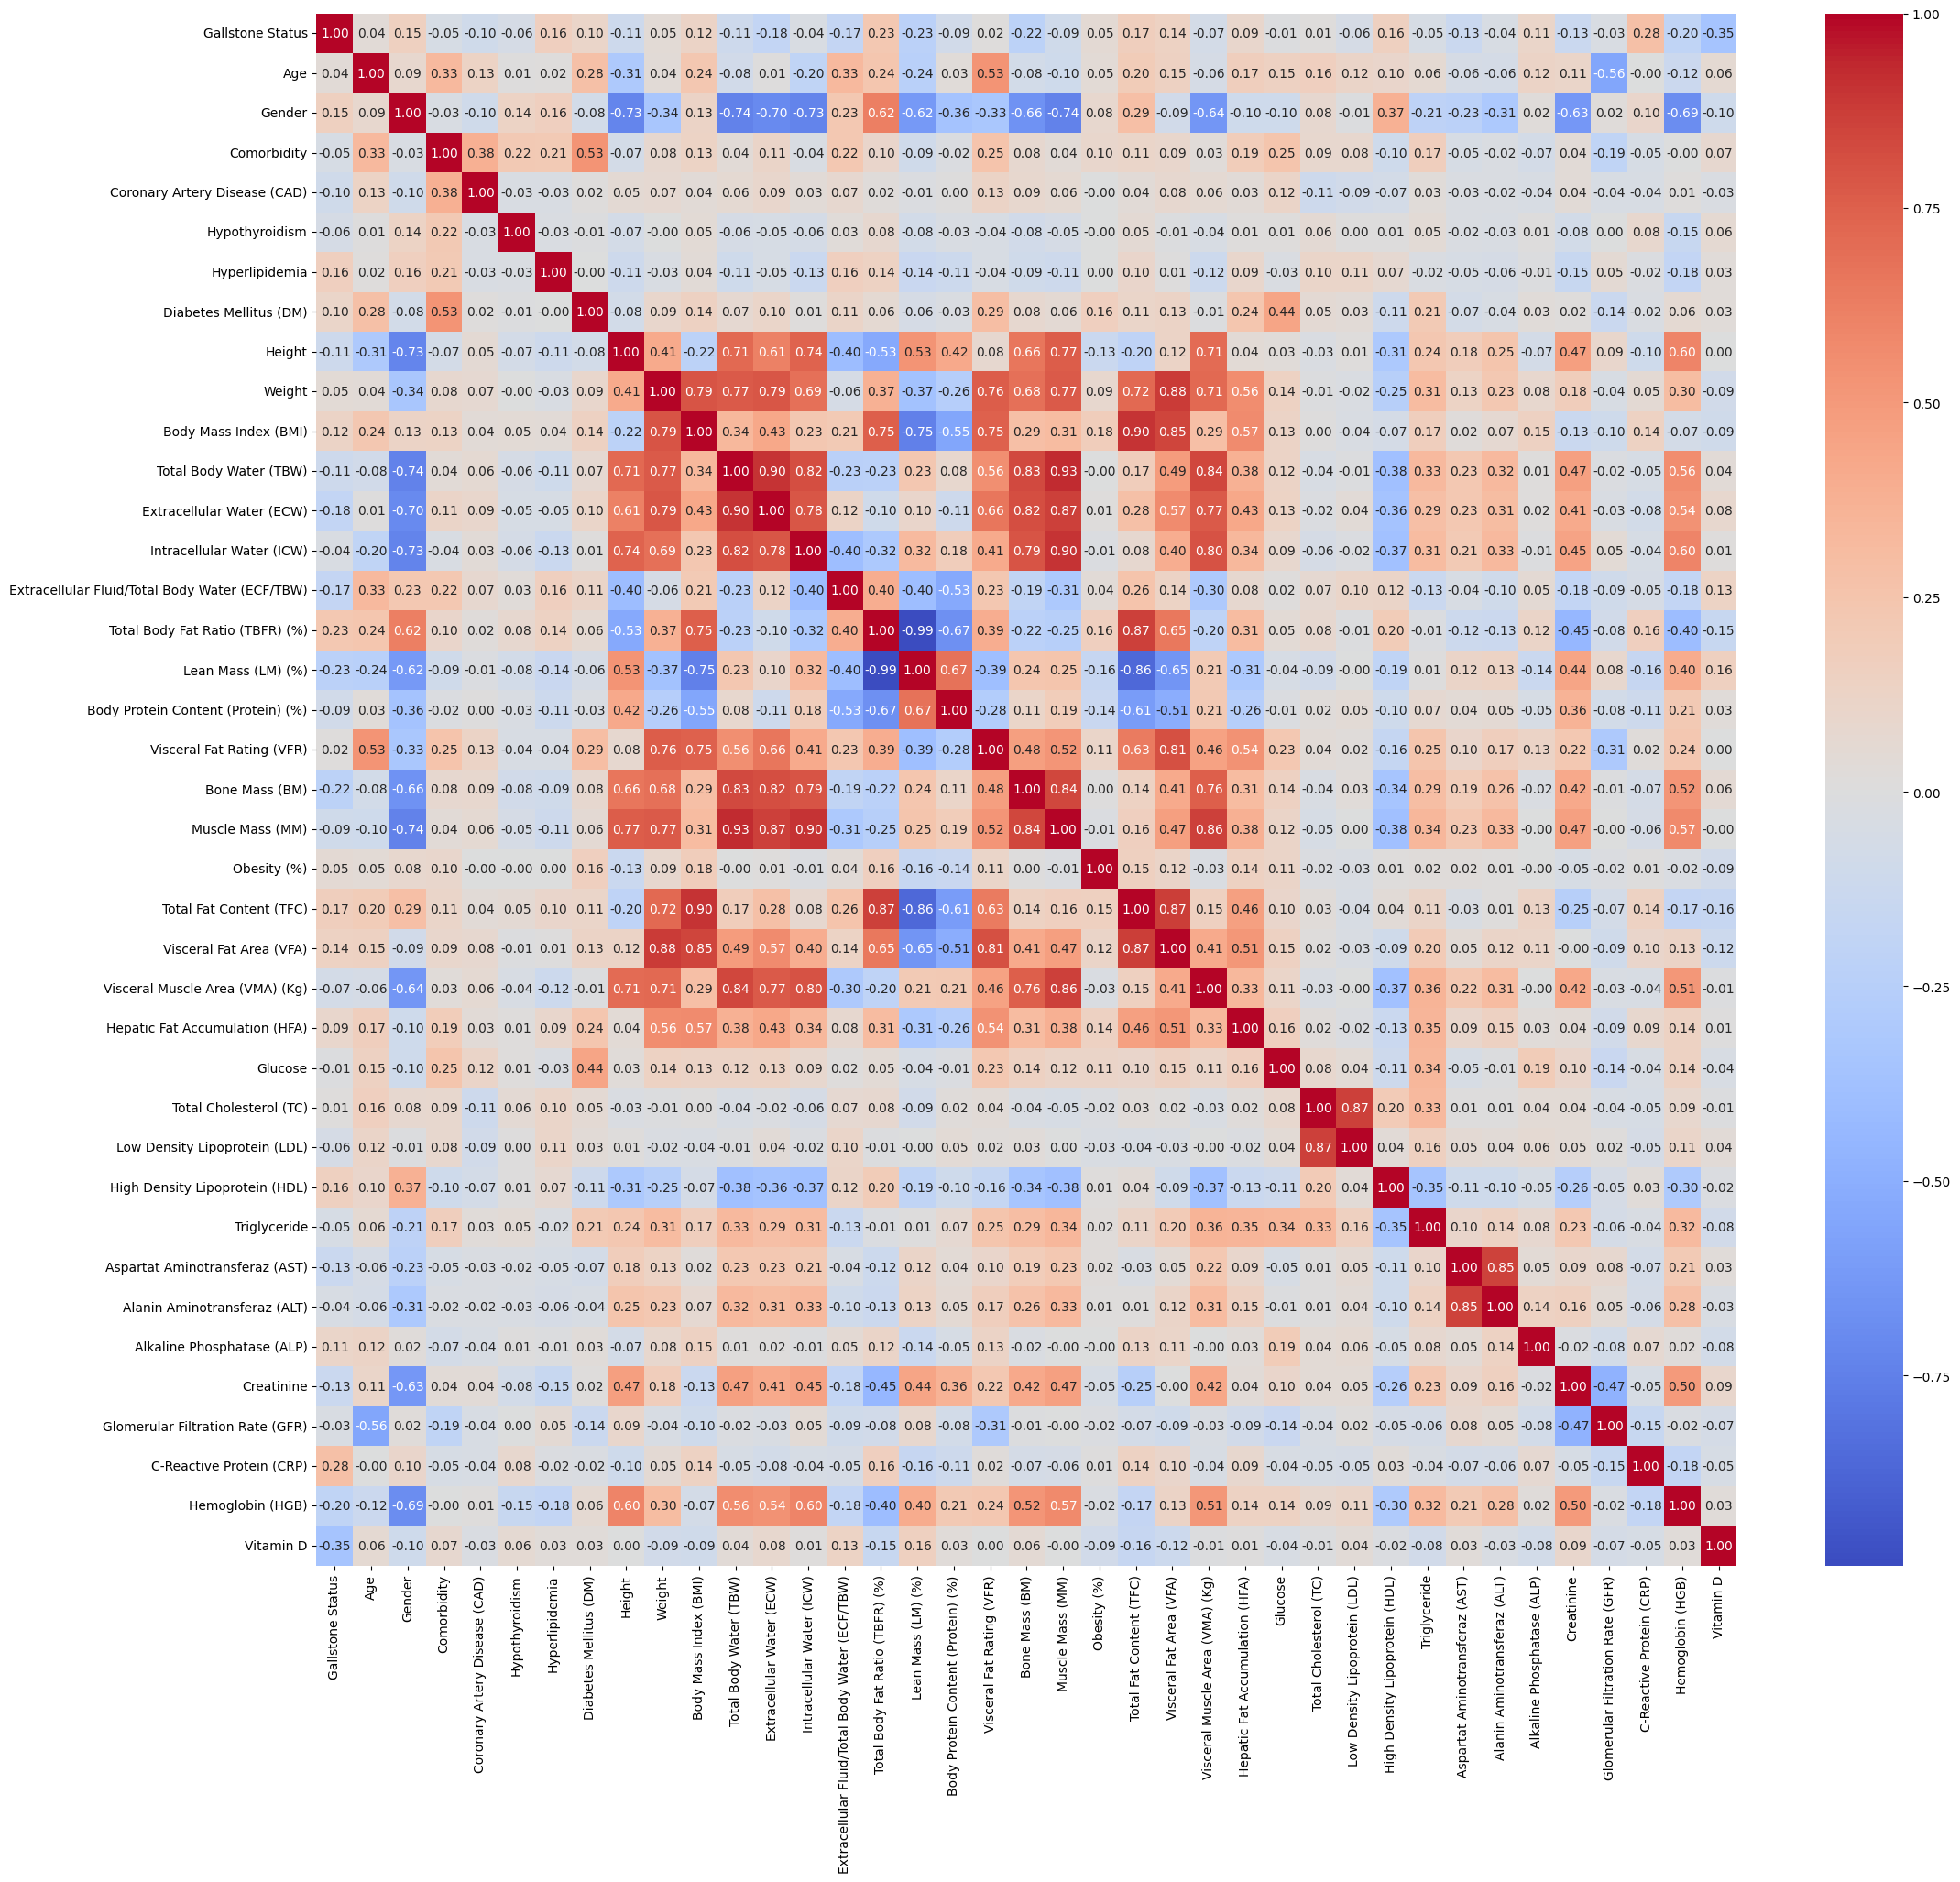

In [13]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [14]:
#feature distribution by target

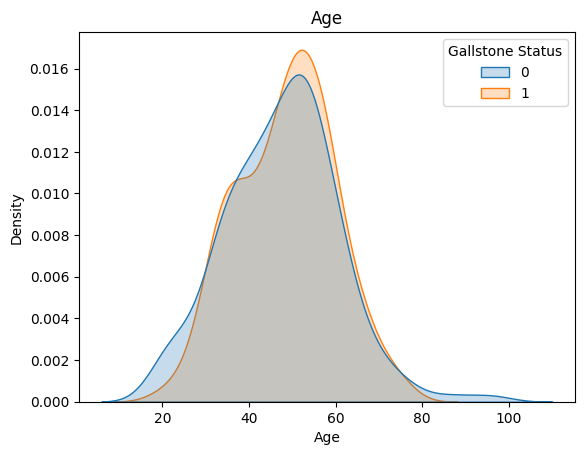

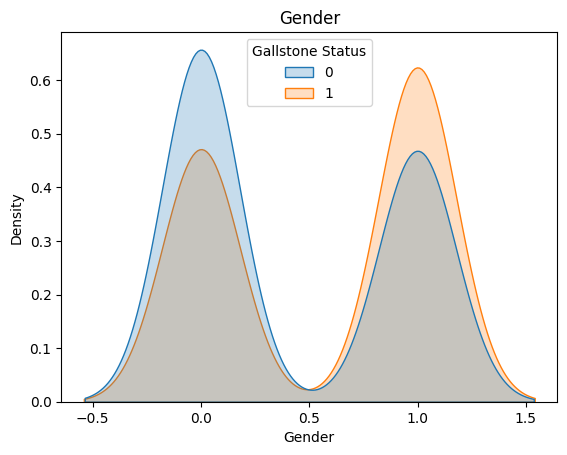

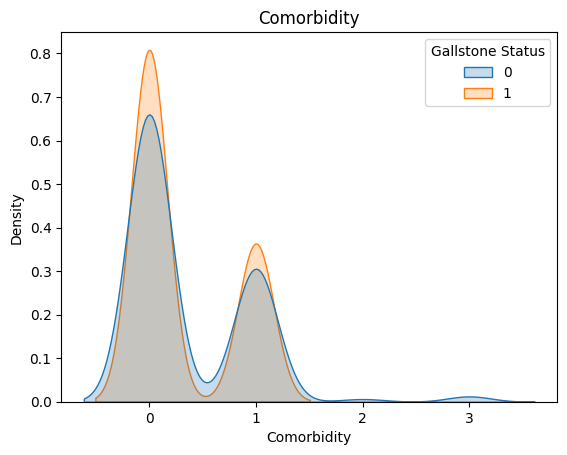

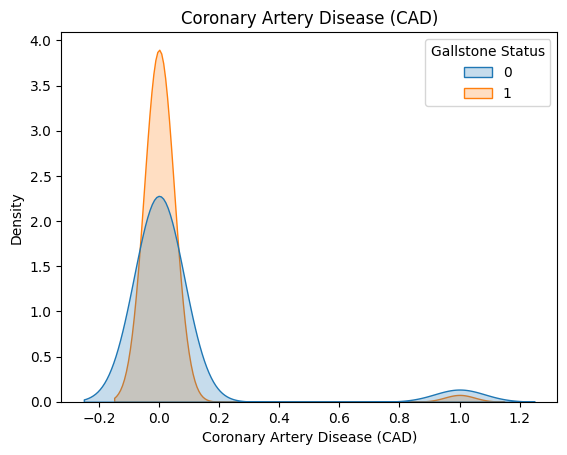

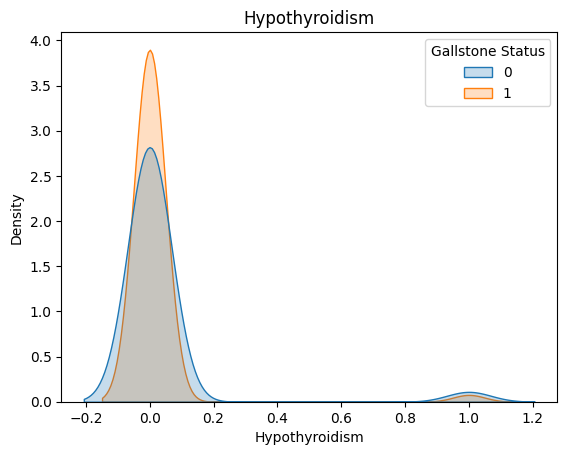

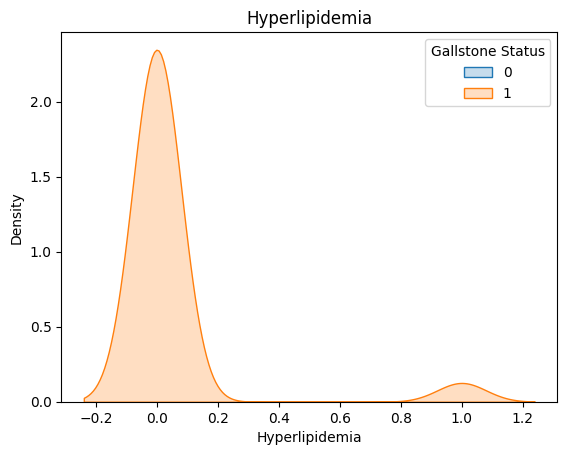

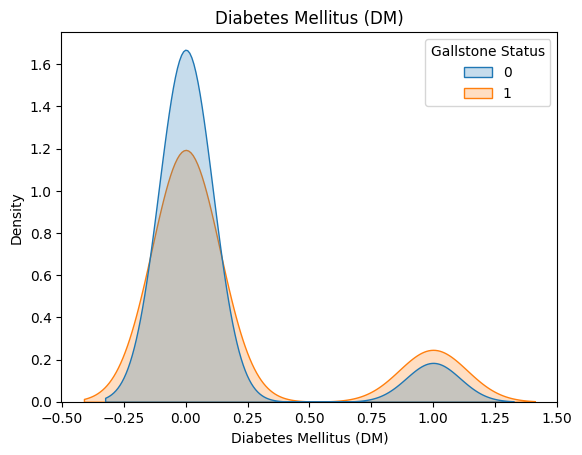

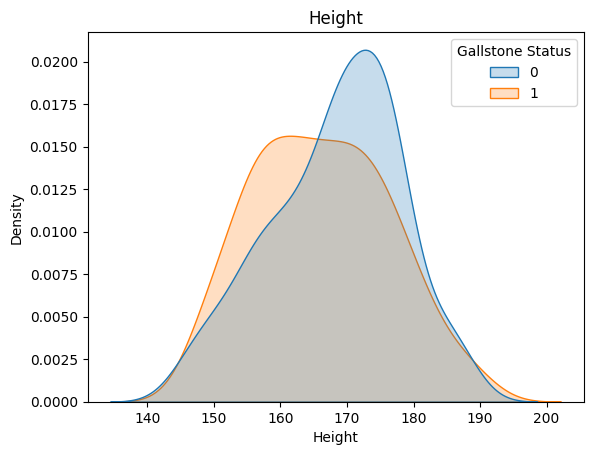

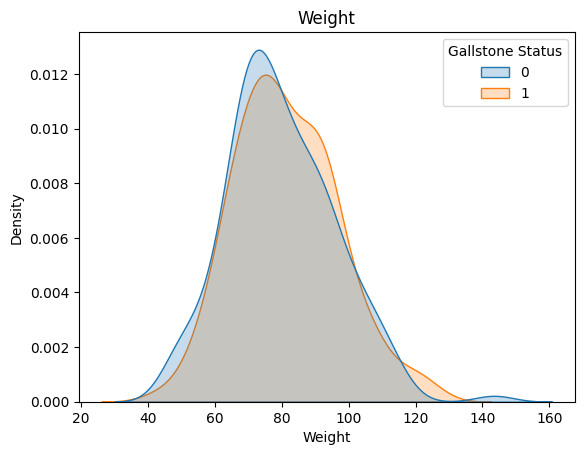

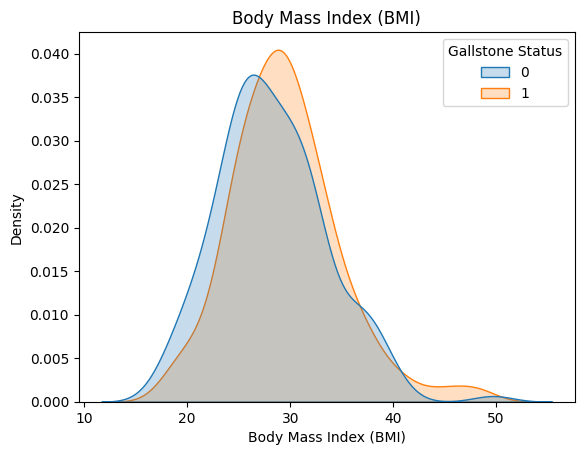

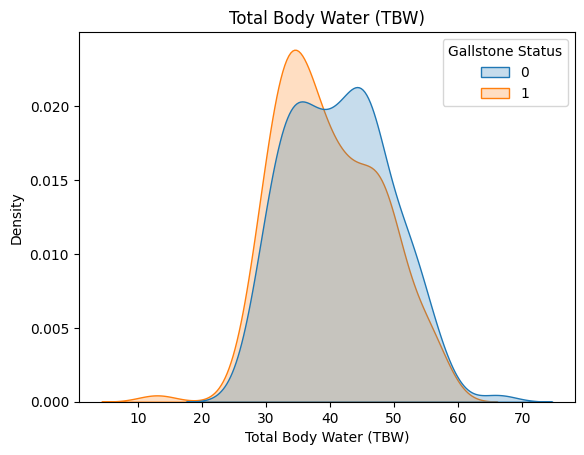

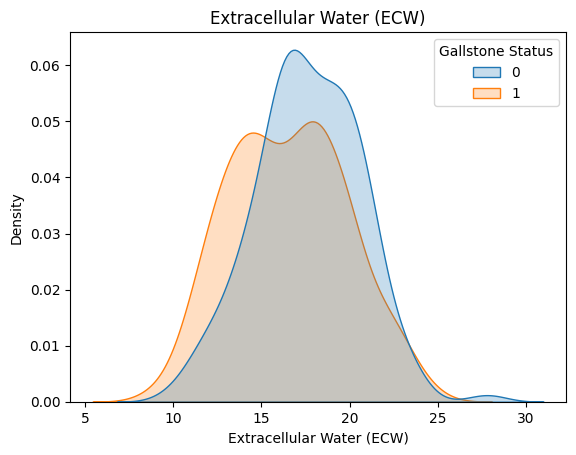

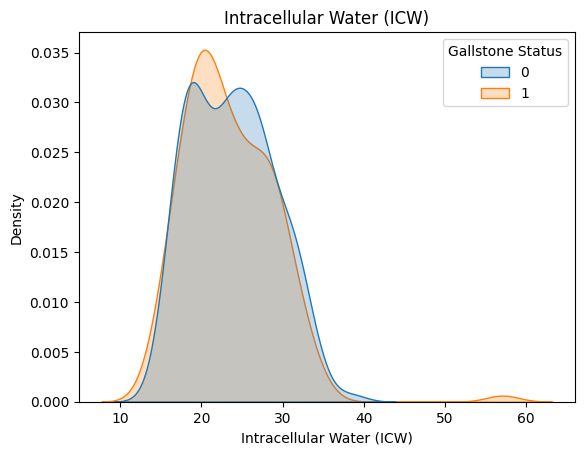

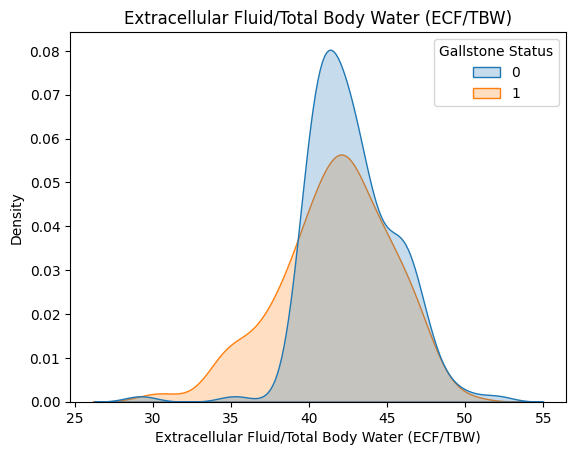

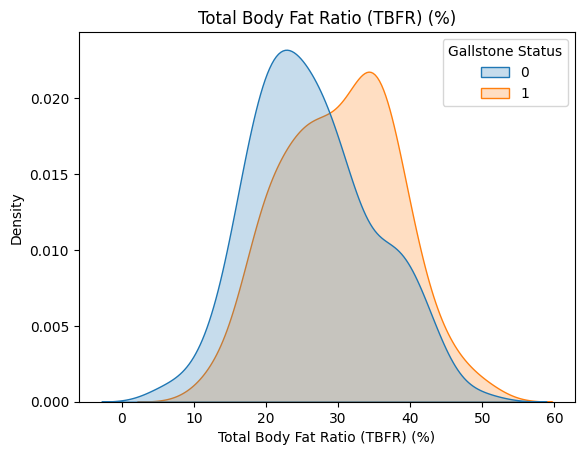

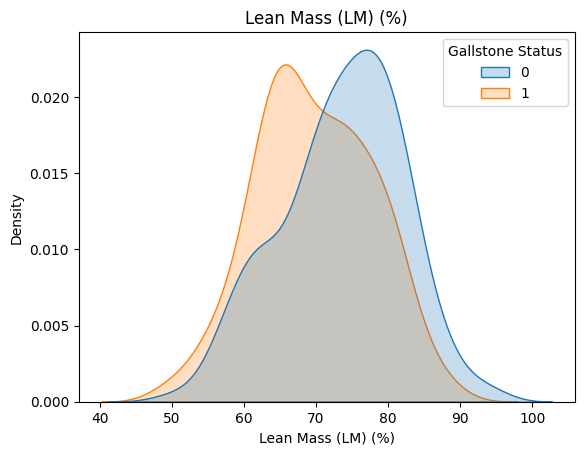

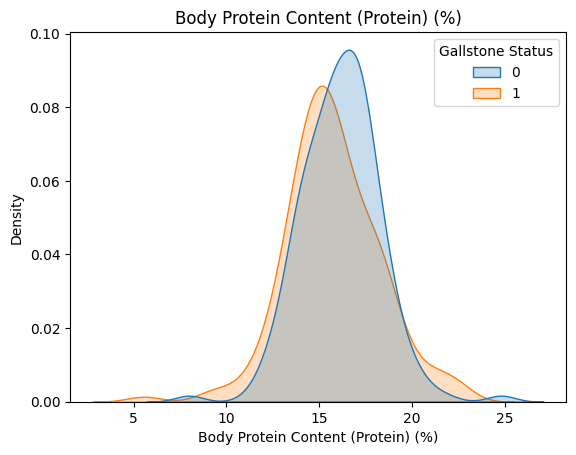

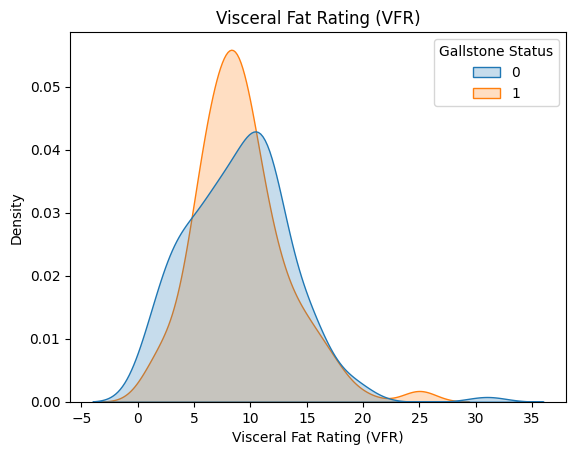

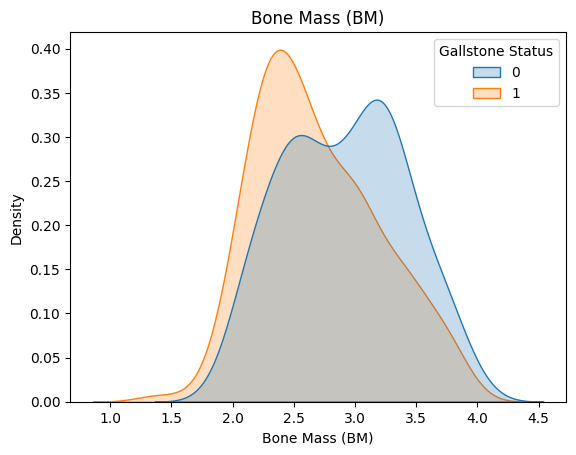

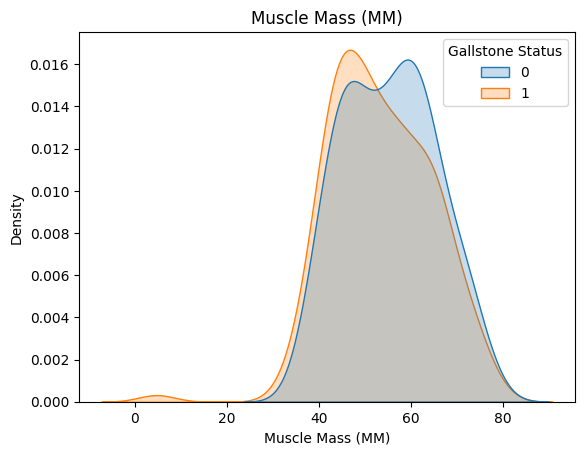

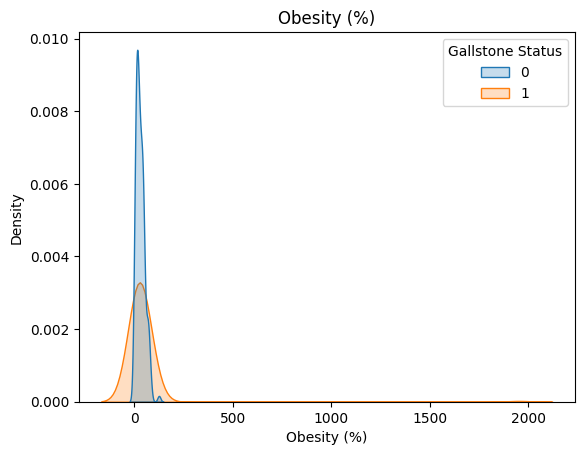

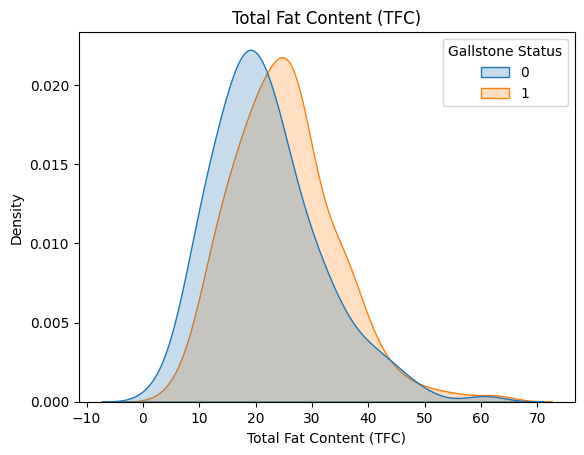

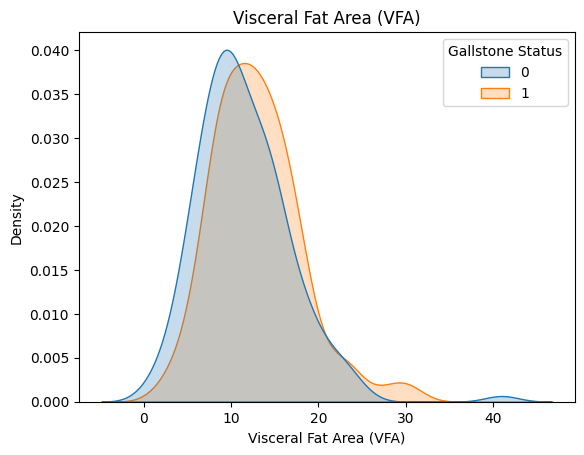

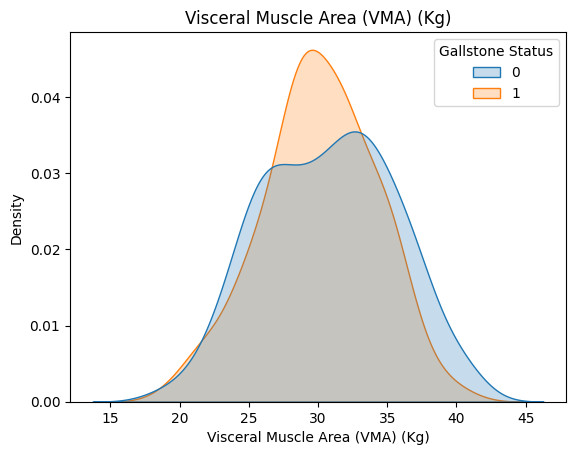

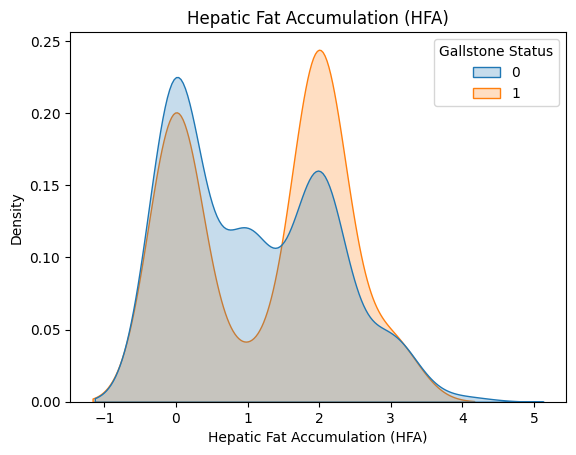

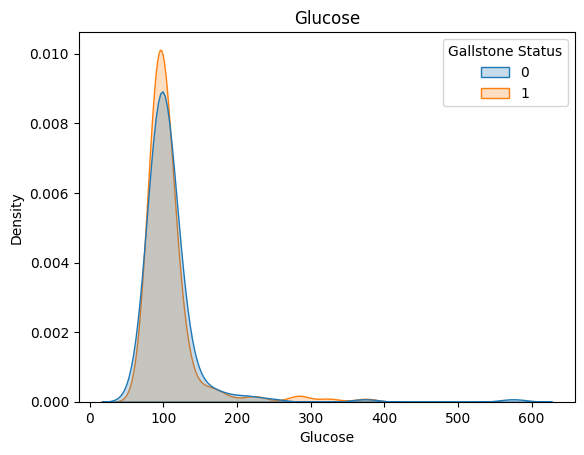

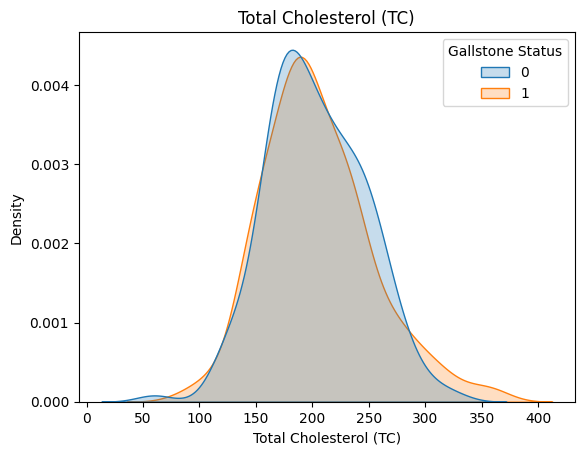

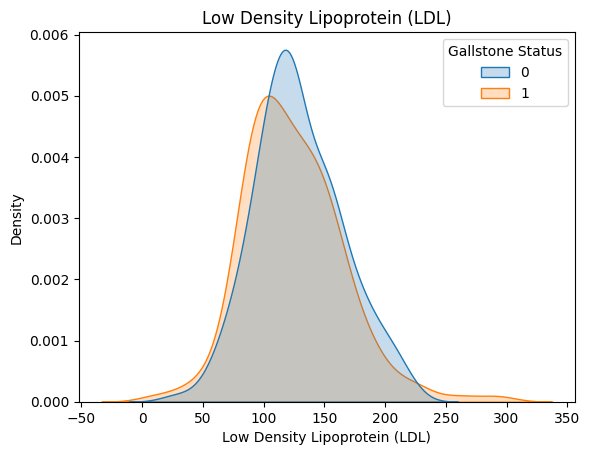

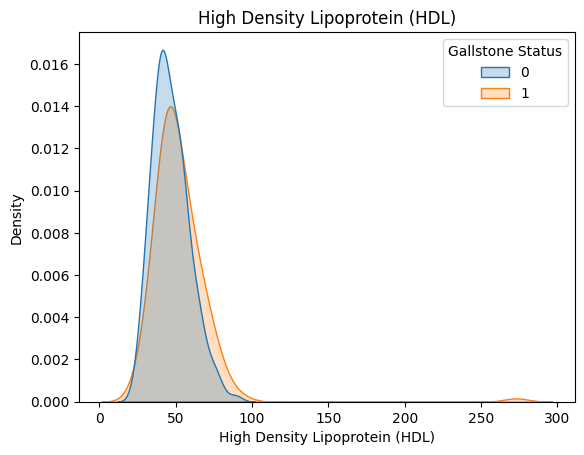

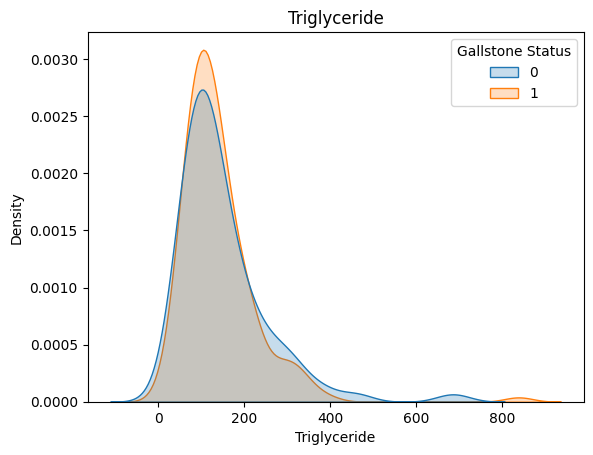

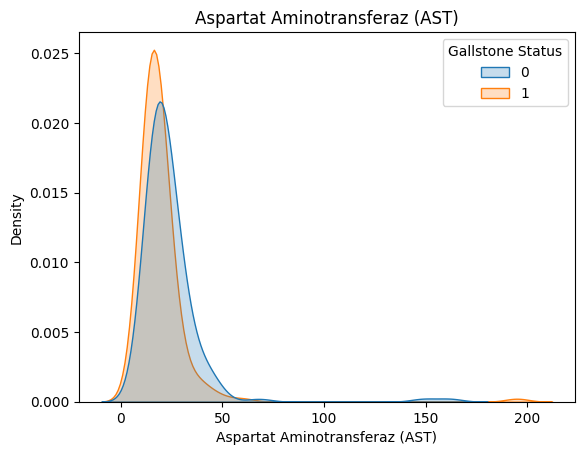

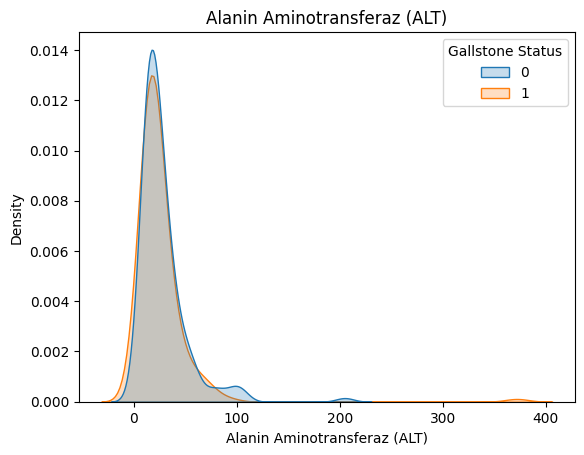

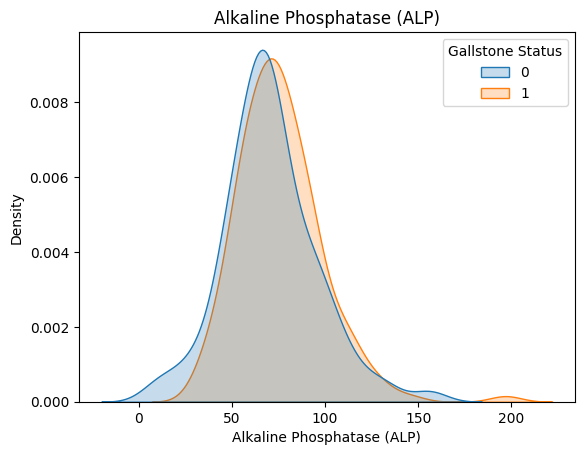

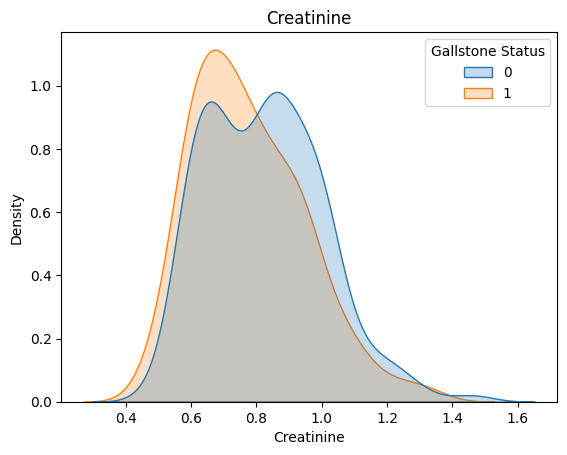

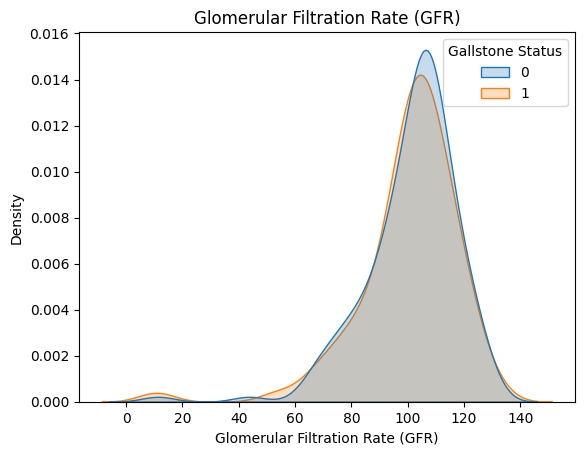

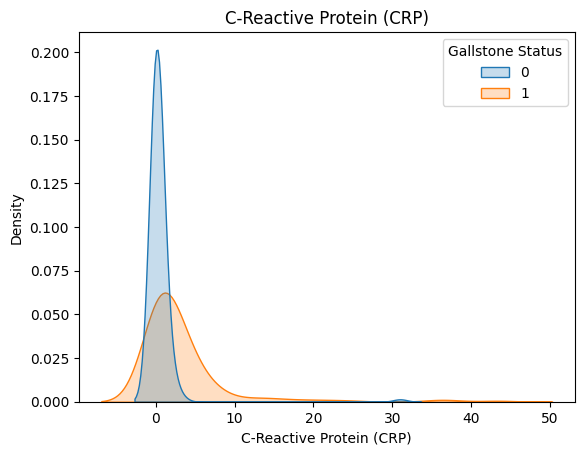

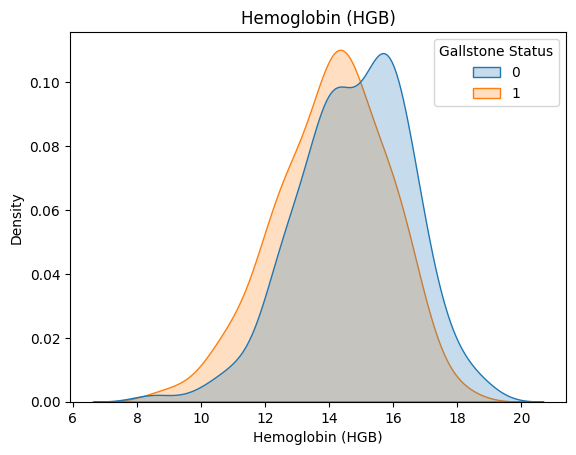

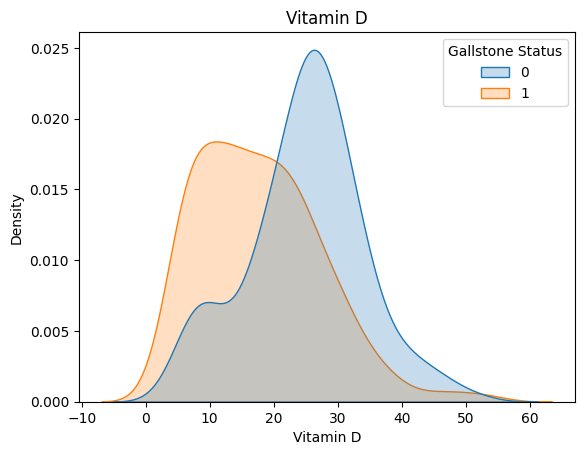

In [15]:
features = df.drop(columns='Gallstone Status')
for col in features:
    sns.kdeplot(data=df, x=col, hue='Gallstone Status', fill = True, warn_singular=False)
    plt.title(col)
    plt.show()

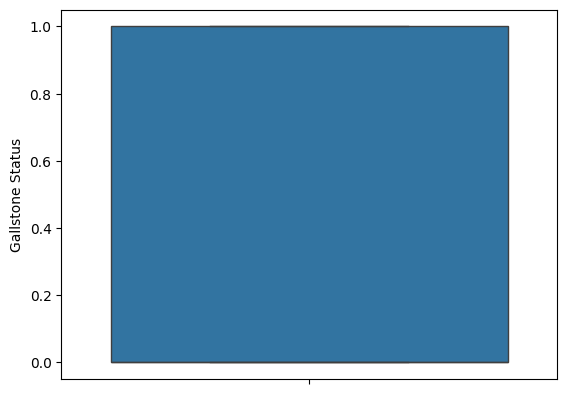

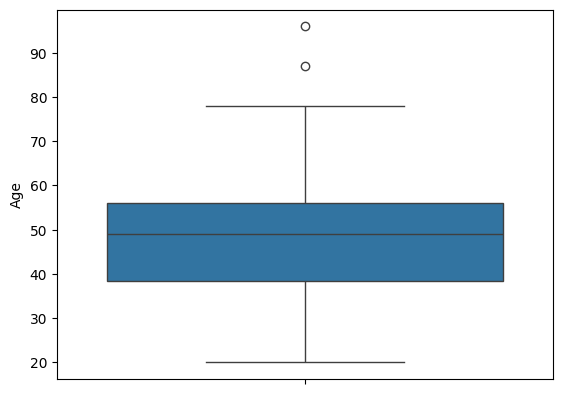

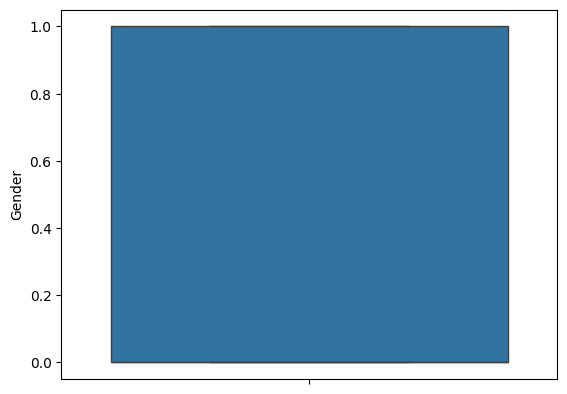

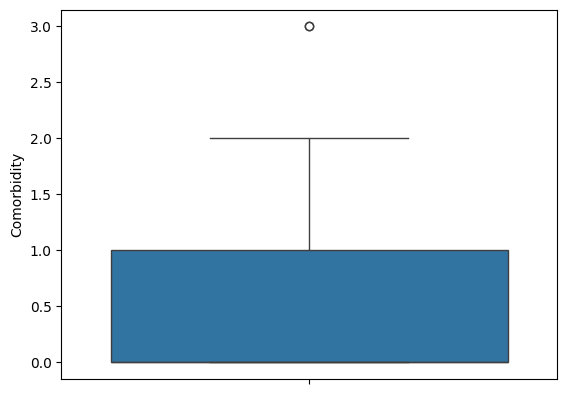

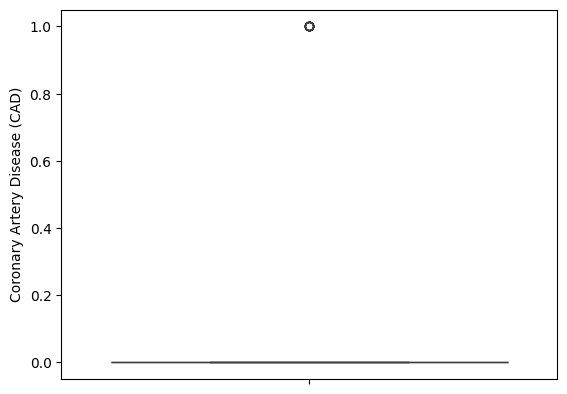

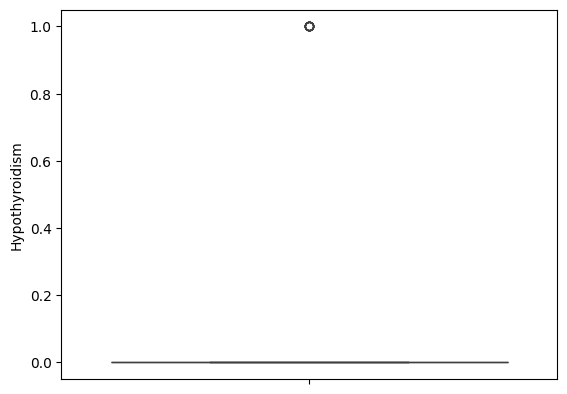

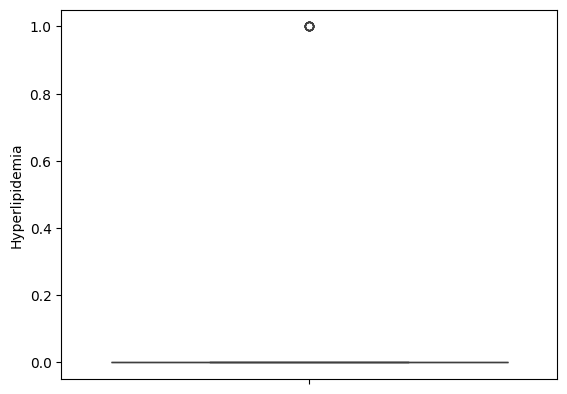

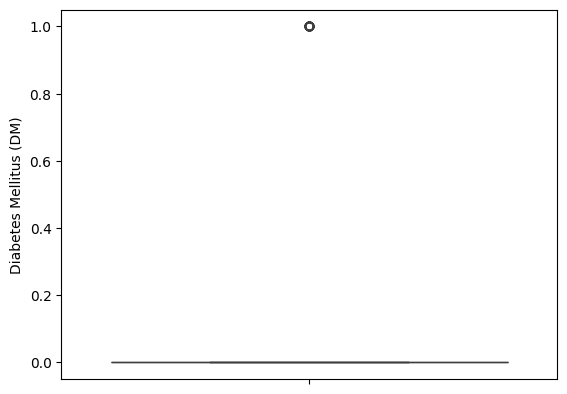

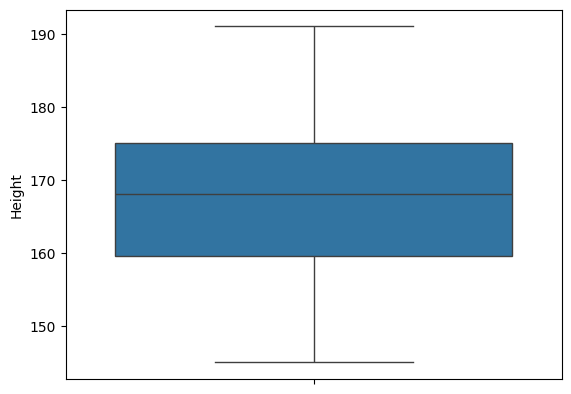

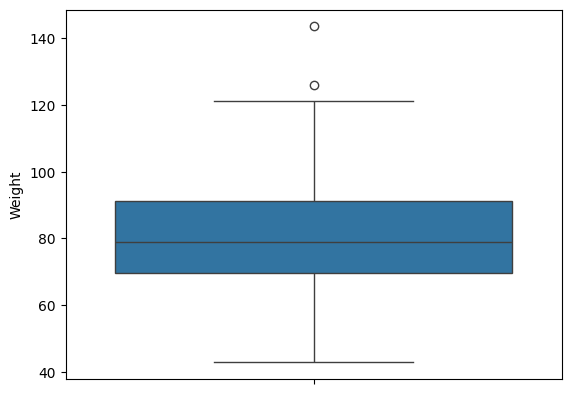

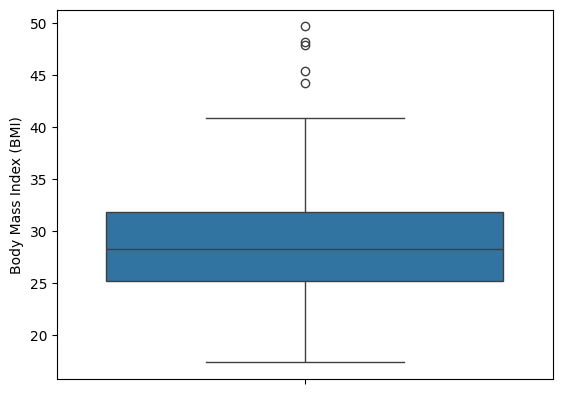

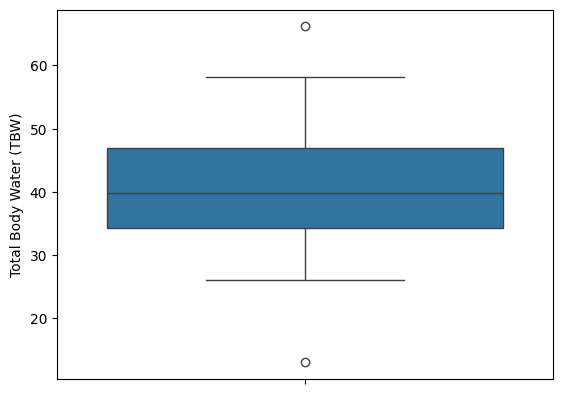

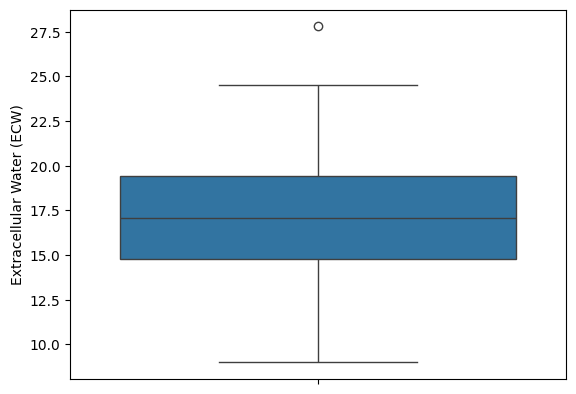

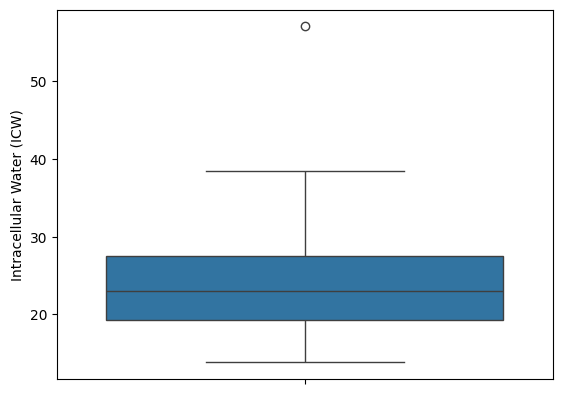

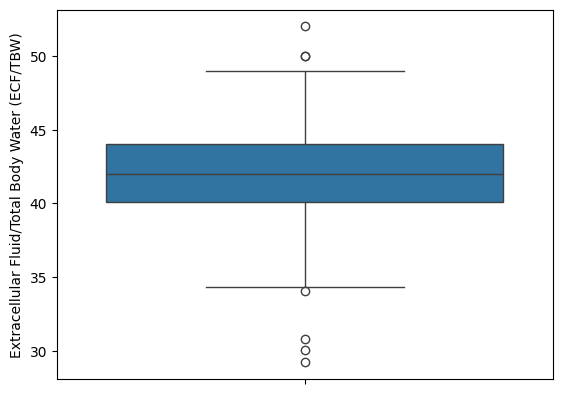

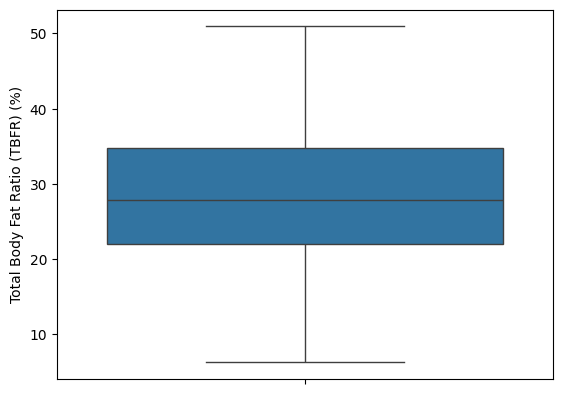

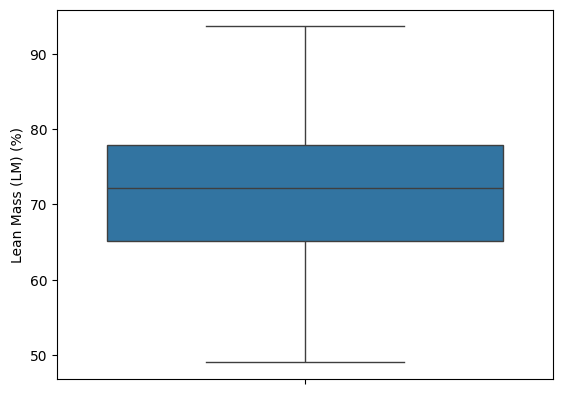

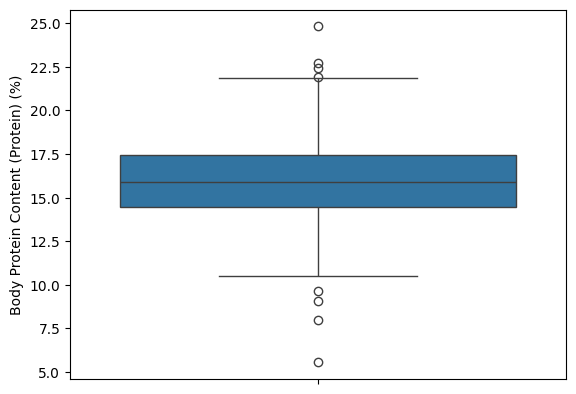

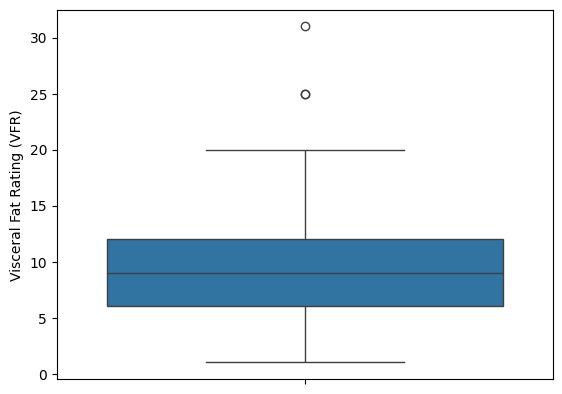

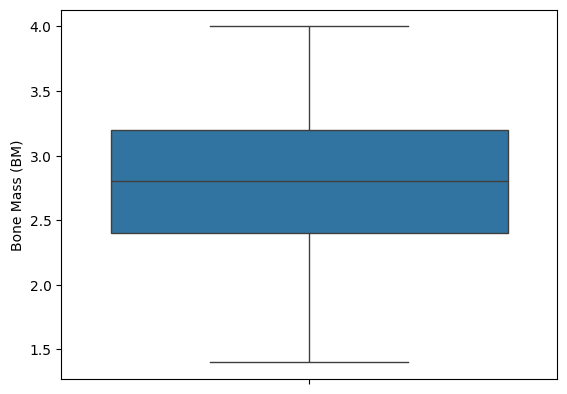

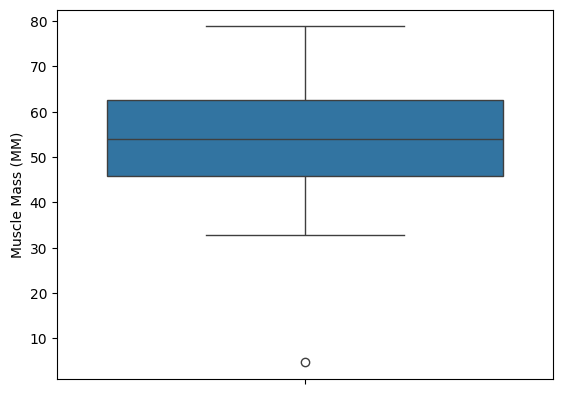

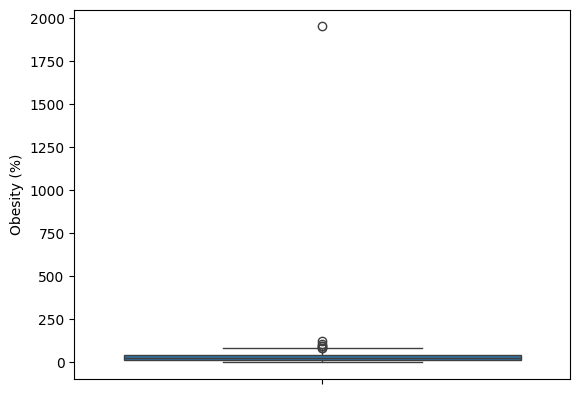

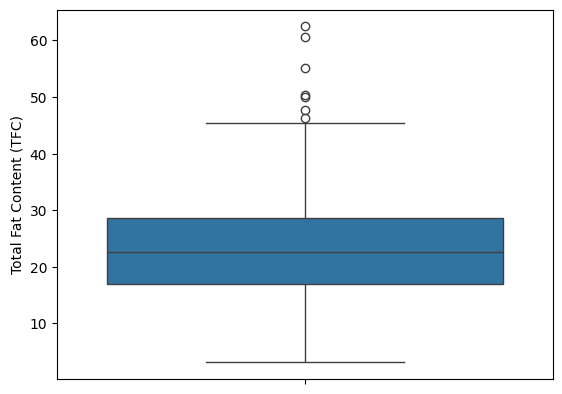

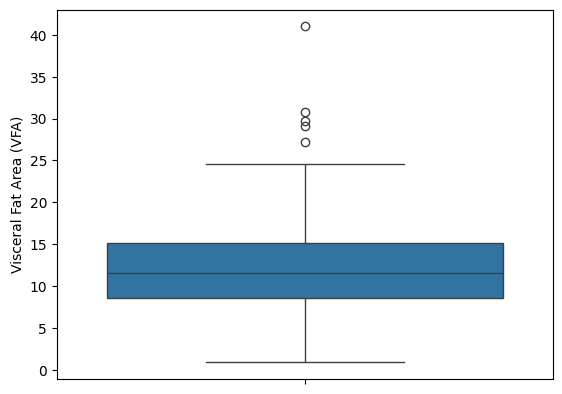

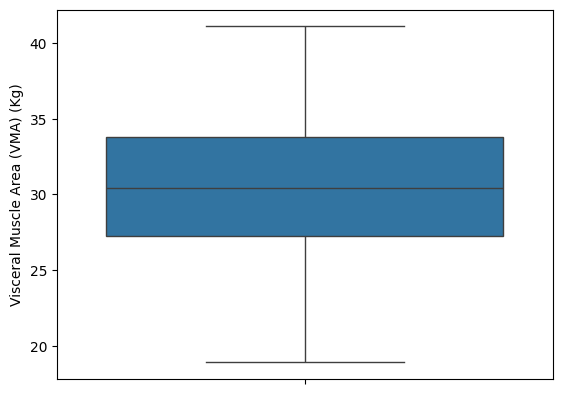

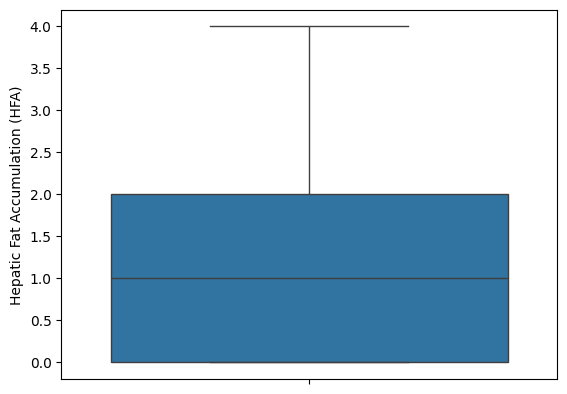

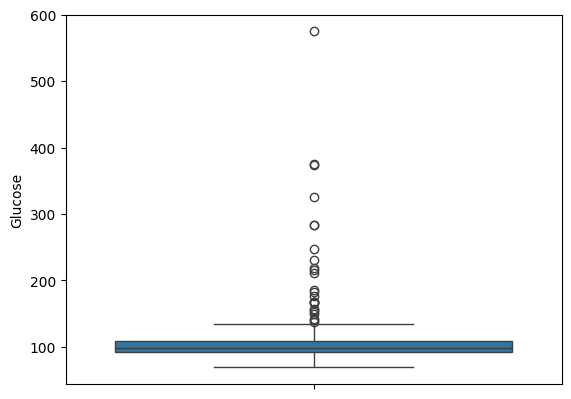

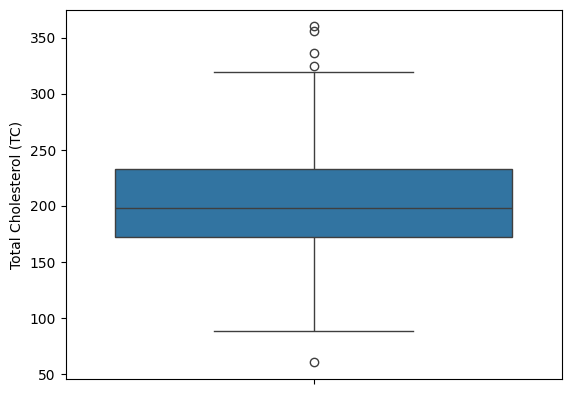

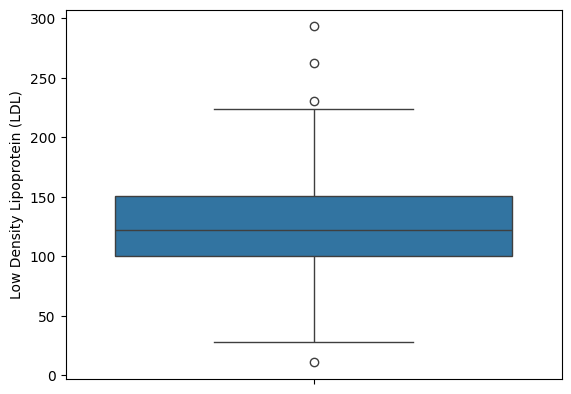

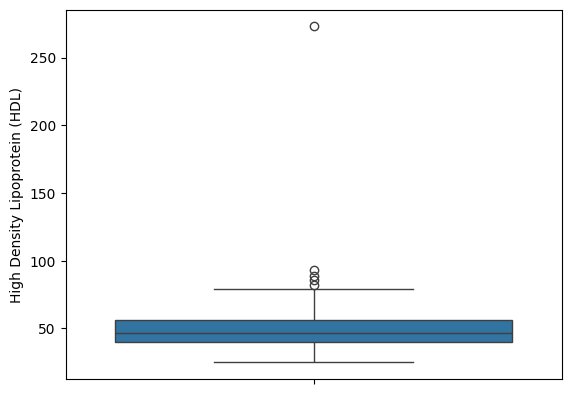

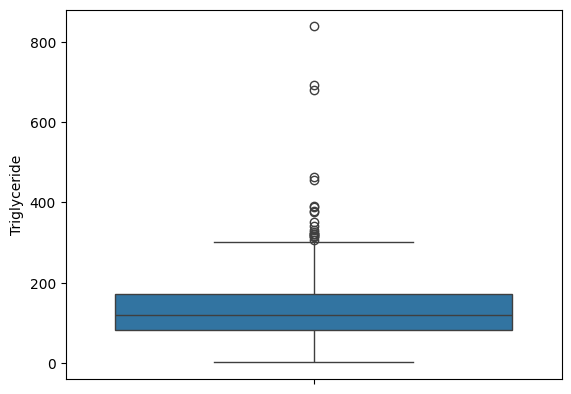

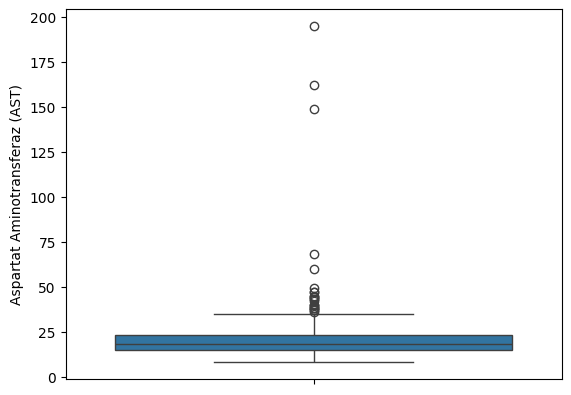

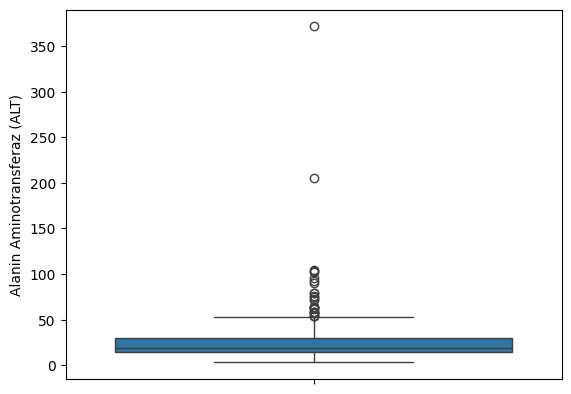

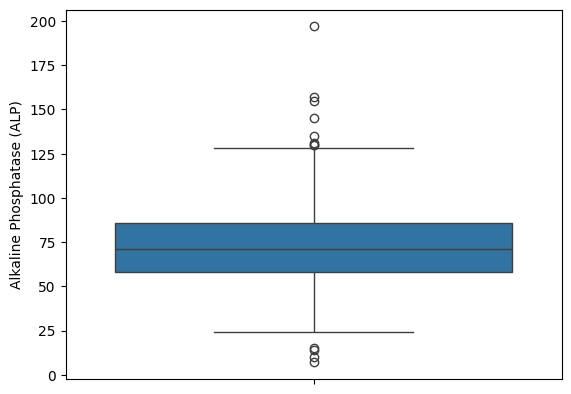

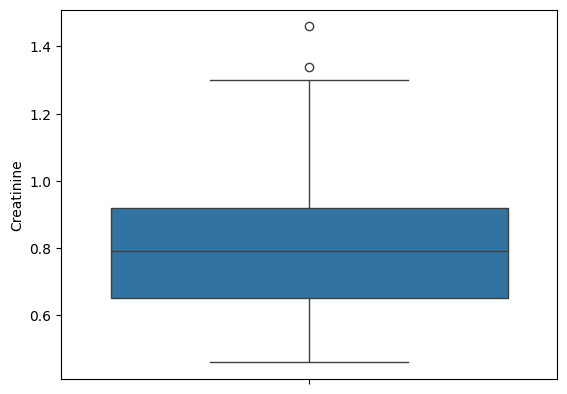

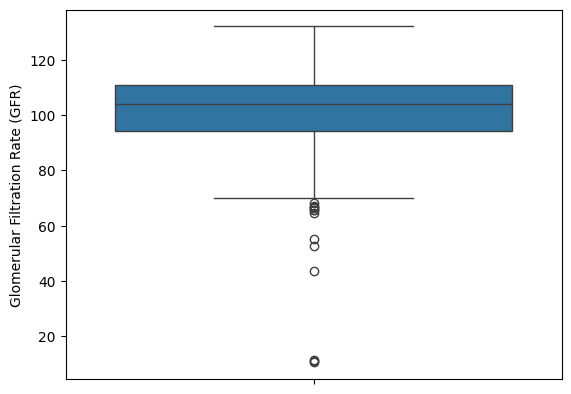

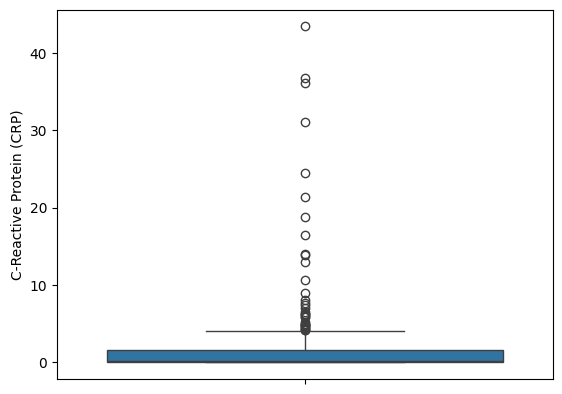

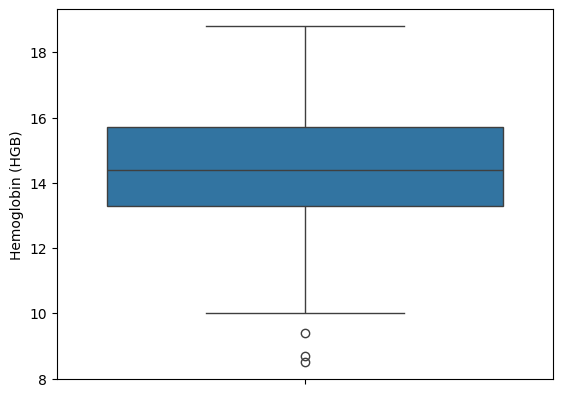

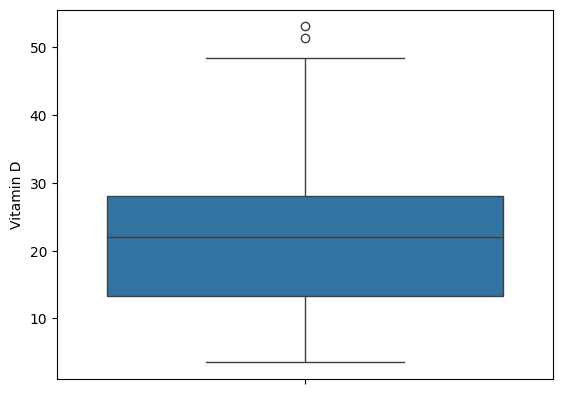

In [16]:
for col in df.columns:
    sns.boxplot(y=df[col])
    plt.show()

In [17]:
#train test split

In [18]:
X = df.drop(columns='Gallstone Status')
y = df['Gallstone Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(f'Shapes of data:\nX_train : {X_train.shape}\nX_test : {X_test.shape}\ny_train : {y_train.shape}\ny_test : {y_test.shape}')

Shapes of data:
X_train : (255, 38)
X_test : (64, 38)
y_train : (255,)
y_test : (64,)


In [20]:
#model building

In [27]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boost' : GradientBoostingClassifier(),
    'SVM' : SVC(probability=True), #needed for ROC AUC
    'KNN' : KNeighborsClassifier(),
    'XGBoost' : XGBClassifier(eval_metric='logloss') 
}

In [28]:
#Scaling the features before fitting the model

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
#fitting the models

In [31]:
accuracy = {}
for name,model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("="*20)
    print(f"Training {name} model.....")
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy score : {acc}")
    print(f"Classification report : \n{classification_report(y_test, y_pred)}")
    print("="*20)
    accuracy[name] = acc
print("Training completed.")

Training Logistic Regression model.....
Accuracy score : 0.78125
Classification report : 
              precision    recall  f1-score   support

           0       0.74      0.88      0.81        33
           1       0.84      0.68      0.75        31

    accuracy                           0.78        64
   macro avg       0.79      0.78      0.78        64
weighted avg       0.79      0.78      0.78        64

Training Decision Tree model.....
Accuracy score : 0.75
Classification report : 
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        33
           1       0.74      0.74      0.74        31

    accuracy                           0.75        64
   macro avg       0.75      0.75      0.75        64
weighted avg       0.75      0.75      0.75        64

Training Random Forest model.....
Accuracy score : 0.8125
Classification report : 
              precision    recall  f1-score   support

           0       0.80      0.85    

In [32]:
print(f"Accuracy scores : \n{accuracy}")

Accuracy scores : 
{'Logistic Regression': 0.78125, 'Decision Tree': 0.75, 'Random Forest': 0.8125, 'Gradient Boost': 0.875, 'SVM': 0.734375, 'KNN': 0.484375, 'XGBoost': 0.84375}


In [36]:
print(f"Best model is \"{max(accuracy, key=accuracy.get)}\" with high accuracy of {max(accuracy.values())}")

Best model is "Gradient Boost" with high accuracy of 0.875


In [37]:
#plotting the accuracy scores

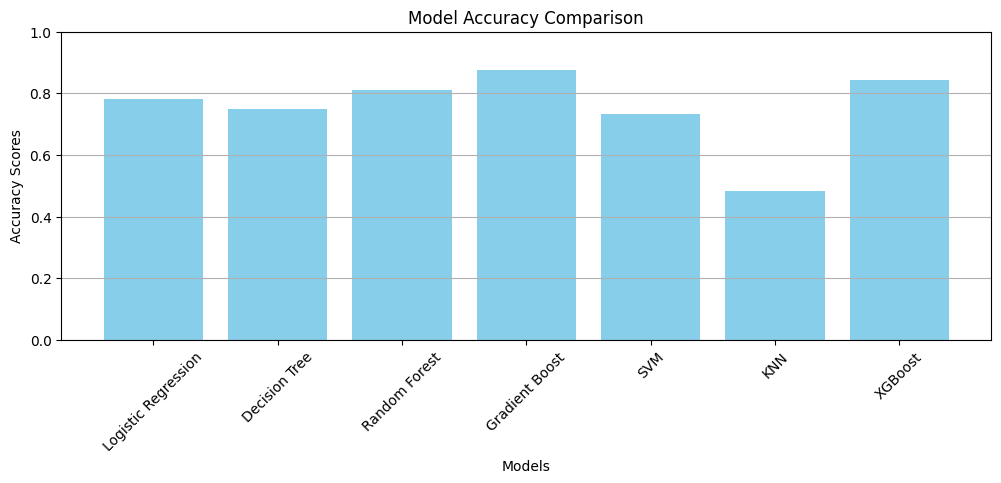

In [42]:
plt.figure(figsize = (12,4))
plt.bar(accuracy.keys(),accuracy.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

In [45]:
#cross validating the best model

In [52]:
for name, model in models.items():
    cv_score = cross_val_score(model, X_train_scaled, y_train, cv = 5, scoring = 'accuracy')
    print(f"Cross validated accuracy of {name} : {cv_score.mean()} +- {cv_score.std()}")

Cross validated accuracy of Logistic Regression : 0.7686274509803922 +- 0.02601274345376786
Cross validated accuracy of Decision Tree : 0.6549019607843137 +- 0.09079087766894296
Cross validated accuracy of Random Forest : 0.788235294117647 +- 0.048665386847022984
Cross validated accuracy of Gradient Boost : 0.7529411764705882 +- 0.06746921778072648
Cross validated accuracy of SVM : 0.7372549019607842 +- 0.04573295603800237
Cross validated accuracy of KNN : 0.6470588235294118 +- 0.03037633997025427
Cross validated accuracy of XGBoost : 0.7764705882352941 +- 0.06631974323642258


Since comparing the cross validation scores, could see the Random Forest is the best model.

In [53]:
#hyperparameter tuning for Random Forest

In [56]:
param_grid = {
    'n_estimators' : [100,200,300],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\aoa\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
262 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aoa\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aoa\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\aoa\AppData\Roaming\Python\Pyth

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [61]:
print(f"Best parameters are : {grid.best_params_}")
print(f"Best CV score : %.4f" % grid.best_score_)

Best parameters are : {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best CV score : 0.8039


In [62]:
best_model = grid.best_estimator_
best_model

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=300)

In [63]:
#testing the tuned model using X_test

In [64]:
y_pred_best = best_model.predict(X_test_scaled)
print("Final Accuracy on test test : %.4f" % accuracy_score(y_test, y_pred_best))

Final Accuracy on test test : 0.8438


In [65]:
#ROC curve + AUC

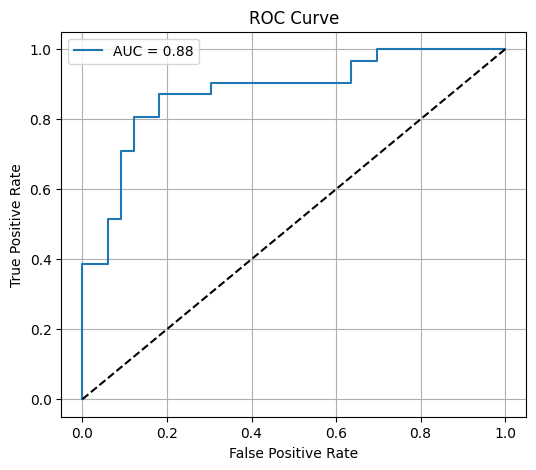

In [68]:
y_proba = best_model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize = (6,5))
plt.plot(fpr, tpr, label = f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

The accuracy of our best tuned Random Forest Classifier is 0.84 and AUC score is 0.88. It means that the model is doing a good job in distinguishing between classes. The model has 88% chance of ranking a random positive instance higher than a random negative instance.

In [70]:
#confusion matirx - evaluating true vs predicting classes

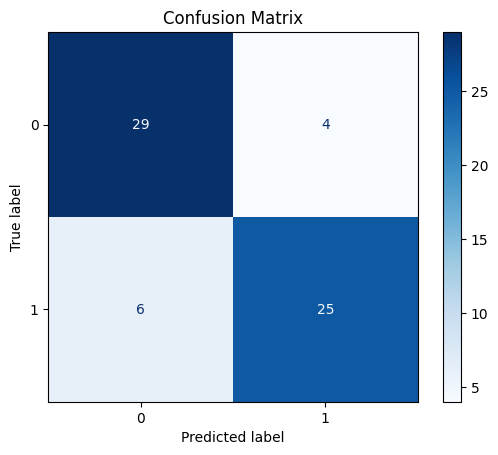

In [78]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Insight:

✅ True Negatives (TN = 29): 29 patients without gallstones correctly predicted.

✅ True Positives (TP = 25): 25 patients with gallstones correctly predicted.

❌ False Positives (FP = 4): 4 patients predicted as having gallstones but they didn’t.

❌ False Negatives (FN = 6): 6 patients with gallstones were missed — this is more concerning in a medical context.

In [79]:
#classification Report

In [85]:
print("Classification Report : \n\n", classification_report(y_test, y_pred_best))

Classification Report : 

               precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.86      0.81      0.83        31

    accuracy                           0.84        64
   macro avg       0.85      0.84      0.84        64
weighted avg       0.84      0.84      0.84        64



In [86]:
#Feature Importance
#Get insights into what features influenced the model most:

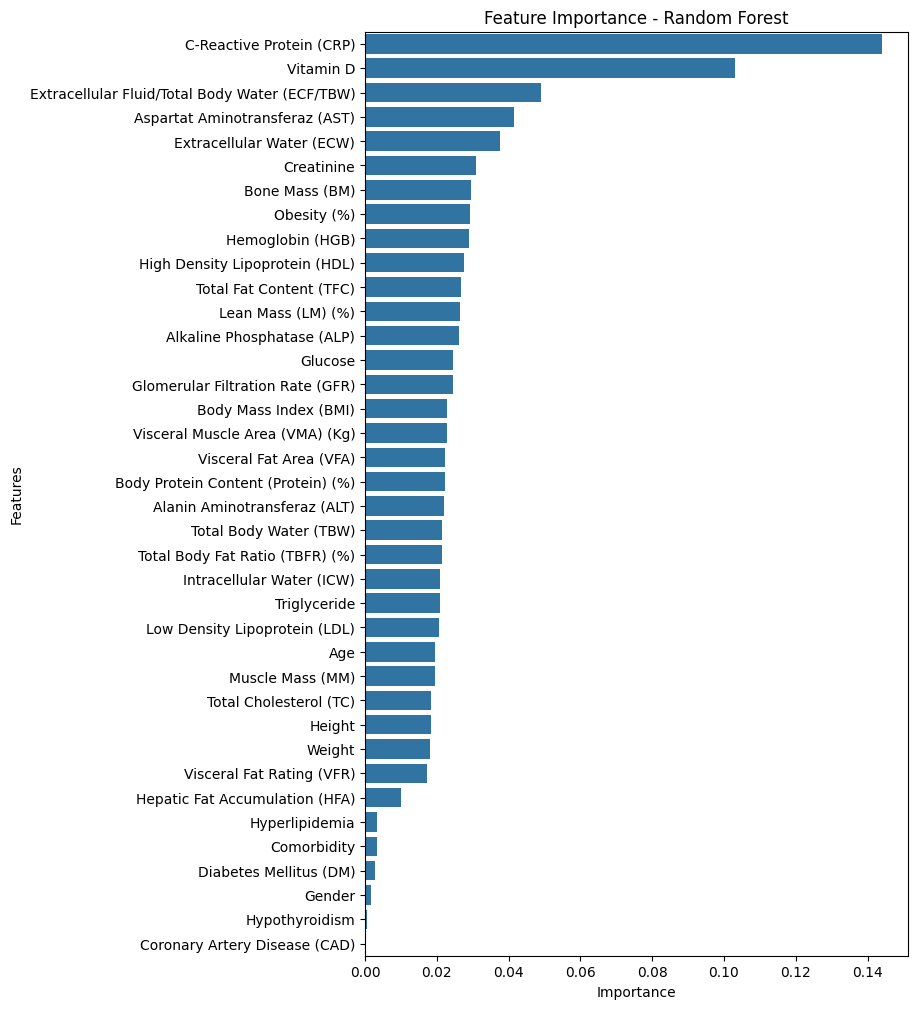

In [89]:
importances = best_model.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize = (7,12))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Insights:

Top Features Driving Gallstone Prediction:
-----------------------------------------
1. C-Reactive Protein (CRP) — Highest importance

Inflammation marker. High CRP is often associated with biliary inflammation or gallbladder issues. Makes total medical sense.

2. Vitamin D

Some studies suggest Vitamin D deficiency is linked to metabolic disorders and gallstone formation.

3. ECF/Total Body Water (ECF/TBW) & ECW

Both relate to fluid distribution and body composition. Gallstone risk could be linked to metabolic imbalance.

4. AST (Aspartate Aminotransferase) & Creatinine

AST is a liver enzyme — liver dysfunction and gallbladder issues are often interconnected.

Creatinine reflects kidney function but can also tie into overall metabolic health.

Middle Tier Features (Still Important):
--------------------------------------

Obesity %, BMI, Visceral Fat Area → No surprise. Obesity is a well-known gallstone risk factor.

Bone Mass, HDL, Hemoglobin, Glucose — indirect but valid predictors, likely capturing systemic health and metabolic balance.

Lean Mass, TFC (Total Fat Content), ALP (another liver enzyme) — all playing a role.

Low-Impact Features:
--------------------

Gender, Hypothyroidism, CAD, DM, Hyperlipidemia — near zero importance in this model. That doesn't mean they're medically irrelevant — it just means they didn’t help this model differentiate between gallstone and non-gallstone cases in your dataset.

In [92]:
joblib.dump(best_model, "Gallstone_model.pkl")
loaded_model = joblib.load("Gallstone_model.pkl")

In [93]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
